In [2]:
import os
import sys
import glob 
from functools import reduce
import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import random

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
sys.path.append("../")
from simulation.cloud import *
from simulation.plot import *

In [4]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

---

In [5]:
cloud = Cloud(num_leafs=48,
              num_hosts_per_leaf=48,
              num_rules_per_leaf=10,
              max_vms_per_host=20,
              num_tenants=100,
              min_vms_per_tenant=10,
              max_vms_per_tenant=1000,
              vm_dist='expon',
              num_groups=1000,
              min_group_size=5,
              group_size_dist='uniform',
              placement_dist='colocate-random-linear',
              colocate_num_hosts_per_leaf=20,
              num_bitmaps=5,
              max_batch_size=1)

network[leaf_to_hosts]: initialized.
network[host_to_leaf]: initialized.
tenants[vm_count]: initialized.
tenants[group_count]: initialized.
tenants[groups_to_sizes]: initialized.
tenants[groups_to_vms]: initialized.
placement[tenant_vms_to_host]: initialized.
placement[tenant_vms_to_leaf]: initialized.
placement[tenant_groups_to_leafs_and_count]: initialized.
placement[tenant_groups_leafs_to_hosts_and_bitmap]: initialized.
optimization: complete.


In [6]:
plot = Plot(plt, Data(cloud))

data: complete.


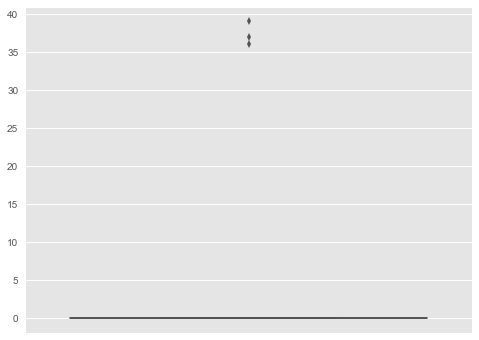

In [7]:
sb.boxplot(y=plot.data.rules_for_all_leafs)

In [8]:
plot.data.rules_for_all_leafs.describe()

count    48.000000
mean      2.333333
std       9.138027
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max      39.000000
dtype: float64

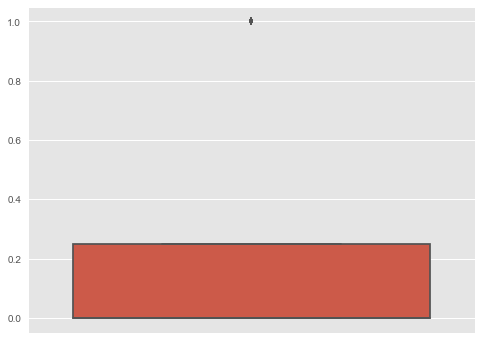

In [9]:
sb.boxplot(y=plot.data.rules_for_all_leafs_post_optimization)

In [10]:
plot.data.rules_for_all_leafs_post_optimization.describe()

count    48.000000
mean      0.250000
std       0.437595
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
dtype: float64

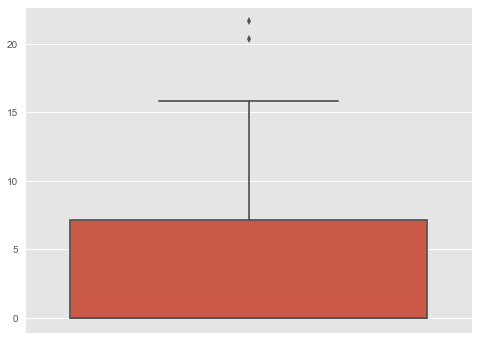

In [11]:
sb.boxplot(y=plot.data.redundancy_for_all_groups_in_all_tenants)

In [12]:
plot.data.redundancy_for_all_groups_in_all_tenants.describe()

count    75.000000
mean      3.775371
std       5.460897
min       0.000000
25%       0.000000
50%       0.000000
75%       7.175032
max      21.621622
dtype: float64

In [37]:
def ecdf(sample):

    # convert sample to a numpy array, if it isn't already
    sample = np.atleast_1d(sample)

    # find the unique values and their corresponding counts
    quantiles, counts = np.unique(sample, return_counts=True)

    # take the cumulative sum of the counts and divide by the sample size to
    # get the cumulative probabilities between 0 and 1
    cumprob = np.cumsum(counts).astype(np.double) / sample.size

    return quantiles, cumprob

In [38]:
q, p = ecdf(plot.data.leafs_for_all_tenants)

In [41]:
plot.data.leafs_for_all_tenants.describe()

count    950.000000
mean       3.110526
std        2.292471
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       11.000000
dtype: float64

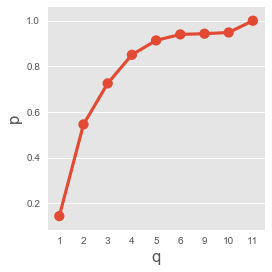

In [45]:
t = pd.DataFrame()

t['q'] = q
t['p'] = p

sb.factorplot(x='q', y='p', data=t)

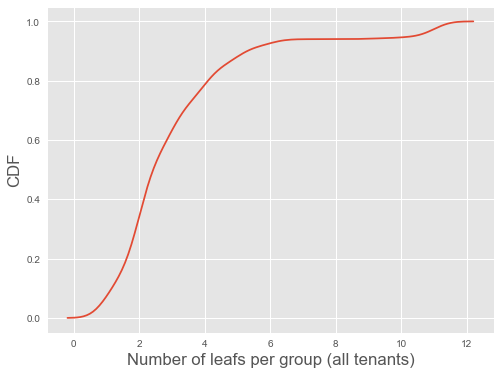

In [46]:
plot.cdf_leafs_for_all_tenants()

In [14]:
from bitstring import BitArray

sum(BitArray('0b1011101') ^ BitArray('0b1001001'))

2